In [1]:
! /Users/fionaz/opt/anaconda3/envs/environment/bin/brew install graphviz


/bin/bash: /Users/fionaz/opt/anaconda3/envs/environment/bin/brew: No such file or directory


In [2]:
# !/Users/fionaz/opt/anaconda3/envs/environment/bin/

# packages used for processing raw data 
from matminer.datasets import load_dataset
import pymatgen.core.periodic_table as pmgp
import pymatgen.core.composition as pmgc

# package used for performing regression
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

# package used for visualisation
from sklearn.tree import export_graphviz
import pydot



In [3]:
# helper functions
def avg(x):
    k = 0
    sum = 0
    for i in x:
        if i != None:
            k += 1
            sum += i
    if k != 0:
        return sum / k
    return 0

def cvt_float(x):
    if x != None:
        return float(x)
    else:
        return None

In [4]:
# get physical descriptors for double perovskites dataset

# Load dataset
raw_double = load_dataset("double_perovskites_gap")
raw_double_feature_list = list(raw_double.columns)

# get dataframe of formula
df_double = pd.DataFrame({"formula": raw_double["formula"], "gap gllbsc": raw_double["gap gllbsc"]})

# get composition
df_double["composition"] = df_double["formula"].apply(lambda x: tuple(pmgc.Composition(x)))

# get avg electroneg
df_double["avg electroneg"] = df_double["formula"].apply(lambda x: cvt_float(pmgc.Composition(x).average_electroneg or None))

# get avg cation electroneg
df_double["avg cation electroneg"] = df_double["formula"].apply(lambda x: cvt_float(pmgc.Composition(x[0:len(x)-2]).average_electroneg or None))

# get avg atomic radius
df_double["avg atomic radius"] = df_double["composition"].apply(lambda x: avg([cvt_float(pmgp.Element(i).atomic_radius_calculated or None) for i in x]))

# get avg Van der Waals radius 
df_double["avg van der waals"] = df_double["composition"].apply(lambda x: avg([cvt_float(pmgp.Element(i).van_der_waals_radius or None) for i in x]))

# get avg Mendeleev number
df_double["avg Mendeleev num"] = df_double["composition"].apply(lambda x: avg([cvt_float(pmgp.Element(i).mendeleev_no or None) for i in x]))

# get electrical resistivity
df_double["avg electrical resistivity"] = df_double["composition"].apply(lambda x: avg([cvt_float(pmgp.Element(i).electrical_resistivity or None) for i in x]))

# get avg molar volume
df_double["avg molar volume"] = df_double["composition"].apply(lambda x: avg([cvt_float(pmgp.Element(i).molar_volume or None) for i in x]))

# get thermal conductivity
df_double["avg thermal conductivity"] = df_double["composition"].apply(lambda x: avg([cvt_float(pmgp.Element(i).thermal_conductivity or None) for i in x]))

# get avg boiling point
df_double["avg boiling point"] = df_double["composition"].apply(lambda x: avg([cvt_float(pmgp.Element(i).boiling_point or None) for i in x]))

# get avg melting point
df_double["avg melting point"] = df_double["composition"].apply(lambda x: avg([cvt_float(pmgp.Element(i).melting_point or None) for i in x]))

# get avg critical temperature
df_double["avg critical temperature"] = df_double["composition"].apply(lambda x: avg([cvt_float(pmgp.Element(i).critical_temperature or None) for i in x]))

# get avg superconduction temperature
df_double["avg superconduction temperature"] = df_double["composition"].apply(lambda x: avg([cvt_float(pmgp.Element(i).superconduction_temperature or None) for i in x]))

# get avg bulk modulus
df_double["avg bulk modulus"] = df_double["composition"].apply(lambda x: avg([cvt_float(pmgp.Element(i).bulk_modulus or None) for i in x]))

# get Young's modulus
df_double["avg Youngs modulus"] = df_double["composition"].apply(lambda x: avg([cvt_float(pmgp.Element(i).youngs_modulus or None) for i in x]))

# get avg brinell hardness
df_double["avg brinell hardness"] = df_double["composition"].apply(lambda x: avg([cvt_float(pmgp.Element(i).brinell_hardness or None) for i in x]))

# get avg rigidity modulus
df_double["avg rigidity modulus"] = df_double["composition"].apply(lambda x: avg([cvt_float(pmgp.Element(i).rigidity_modulus or None) for i in x]))

# get avg mineral hardness
df_double["avg mineral hardness"] = df_double["composition"].apply(lambda x: avg([cvt_float(pmgp.Element(i).mineral_hardness or None) for i in x]))

# get avg Vicker’s hardness
df_double["avg Vickers hardness"] = df_double["composition"].apply(lambda x: avg([cvt_float(pmgp.Element(i).vickers_hardness or None) for i in x]))

# get avg density of solid phase
df_double["avg density of solid phase"] = df_double["composition"].apply(lambda x: avg([cvt_float(pmgp.Element(i).density_of_solid or None) for i in x]))

# get avg first ionization energy
df_double["avg first ionization energy"] = df_double["composition"].apply(lambda x: avg([cvt_float(pmgp.Element(i).ionization_energies[0] or None) for i in x]))

print(df_double)




         formula  gap gllbsc          composition  avg electroneg  \
0     AgNbLaAlO6    4.164543  (Ag, Nb, La, Al, O)           2.688   
1     AgNbLaGaO6    4.454629  (Ag, Nb, La, Ga, O)           2.708   
2     AgNbLaInO6    4.192522  (Ag, Nb, La, In, O)           2.705   
3     AgNbMgTiO6    3.963857  (Ag, Nb, Mg, Ti, O)           2.702   
4     AgNbSnTiO6    2.881239  (Ag, Nb, Sn, Ti, O)           2.767   
...          ...         ...                  ...             ...   
1301  TlTaSrGeO6    2.425122  (Tl, Ta, Sr, Ge, O)           2.672   
1302  TlTaSrSiO6    2.297476  (Tl, Ta, Sr, Si, O)           2.661   
1303  TlTaSrSnO6    3.507231  (Tl, Ta, Sr, Sn, O)           2.667   
1304  TlTaSrTiO6    1.877169  (Tl, Ta, Sr, Ti, O)           2.625   
1305   TlTaYAlO6    2.819711   (Tl, Ta, Y, Al, O)           2.659   

      avg cation electroneg  avg atomic radius  avg van der waals  \
0                    1.5600             1.3225              2.016   
1                    1.6100      

In [5]:
# RFR on double perovskite dataset
# Descriptive statistics for each column
df_double.describe()

# copy of df_double
df_double_copy = df_double


# 1: separate into features and targets
# Labels are the values we want to predict
labels = np.array(df_double_copy["gap gllbsc"])



df_double_copy2 = df_double
df_double_copy2 = df_double_copy2.drop("gap gllbsc", axis = 1)
df_double_copy2 = df_double_copy2.drop("composition", axis = 1)
feature_list2 = list(df_double_copy2.columns)
df_double_copy2 = np.array(df_double_copy2)
train_features2, test_features2, train_labels2, test_labels2 = train_test_split(df_double_copy2, labels, test_size = 0.25, random_state = 14)



# Remove the labels from the features: axis 1 refers to the columns
df_double_copy= df_double_copy.drop("gap gllbsc", axis = 1)
df_double_copy= df_double_copy.drop("formula", axis = 1)
df_double_copy= df_double_copy.drop("composition", axis = 1)
# Saving feature names for later use
feature_list = list(df_double_copy.columns)
# Convert to numpy array
df_double_copy = np.array(df_double_copy)


# 2: training and testing sets
# Using Skicit-learn to split data into training and testing sets
# Split the data into training and testing sets
train_features, test_features, train_labels, test_labels = train_test_split(df_double_copy, labels, test_size = 0.25, random_state = 14)
# look at the shape of all data to make sure everything is done correctly
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

# test_features = np.array([list(test_features_copy[i][1:]) for i in range(0, len(test_features_copy), 1)])
# train_features = np.array([list(train_features_copy[i][1:]) for i in range(0, len(train_features_copy), 1)])

# Train model
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 700, random_state = 14)
# Train the model on training data
rf.fit(train_features, train_labels);



# Make predictions
# Use the forest's predict method on the test data
predictions = rf.predict(test_features)
# Calculate the absolute errors
errors = abs(predictions - test_labels)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')



# Determine performance
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / test_labels)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')


# Variable Importance
# Get numerical feature importances
importances = list(rf.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(df_double_copy, round(importance, 2)) for df_double_copy, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Feature: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];


Training Features Shape: (979, 20)
Training Labels Shape: (979,)
Testing Features Shape: (327, 20)
Testing Labels Shape: (327,)
Mean Absolute Error: 0.47 degrees.
Accuracy: 85.13 %.
Feature: avg bulk modulus     Importance: 0.21
Feature: avg superconduction temperature Importance: 0.15
Feature: avg cation electroneg Importance: 0.07
Feature: avg electroneg       Importance: 0.06
Feature: avg boiling point    Importance: 0.06
Feature: avg critical temperature Importance: 0.06
Feature: avg Vickers hardness Importance: 0.05
Feature: avg Mendeleev num    Importance: 0.04
Feature: avg thermal conductivity Importance: 0.04
Feature: avg Youngs modulus   Importance: 0.04
Feature: avg rigidity modulus Importance: 0.03
Feature: avg mineral hardness Importance: 0.03
Feature: avg density of solid phase Importance: 0.03
Feature: avg first ionization energy Importance: 0.03
Feature: avg van der waals    Importance: 0.02
Feature: avg melting point    Importance: 0.02
Feature: avg brinell hardness Imp

In [6]:
print("---20------------------------------------------------------------------------")
# New random forest with only the twenty most important variables
rf_most_important = RandomForestRegressor(n_estimators= 700, random_state=14)
# Extract the three most important features
most_important_indices = [feature_list.index(feature_importances[i][0]) for i in range(0,20)]
most_train_important = train_features[:, most_important_indices]
most_test_important = test_features[:, most_important_indices]
# Train the random forest
rf_most_important.fit(most_train_important, train_labels)
# Make predictions and determine the error
most_20_predictions = rf_most_important.predict(most_test_important)
most_errors = abs(most_20_predictions - test_labels)
# Display the performance metrics
print('Mean Absolute Error of selected 20:', round(np.mean(most_errors), 2), 'degrees.')
most_mape = np.mean(100 * (most_errors / test_labels))
most_accuracy = 100 - most_mape
print('Accuracy of selected 20:', round(most_accuracy, 2), '%.')
# Variable Importance: 20
# Get numerical feature importances
most_20_feature_list = [feature_list[i] for i in most_important_indices]
most_20_importances = list(rf_most_important.feature_importances_)
# List of tuples with variable and importance
most_20_feature_importances = [(df_double_copy, round(importance, 2)) for df_double_copy, importance in zip(most_20_feature_list, most_20_importances)]
# Sort the feature importances by most important first
most_20_feature_importances = sorted(most_20_feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Feature: {:20} Importance: {}'.format(*pair)) for pair in most_20_feature_importances];


print("---15------------------------------------------------------------------------")
# New random forest with only the fifteen most important variables
rf_most_important = RandomForestRegressor(n_estimators= 700, random_state=14)
# Extract the three most important features
most_important_indices = [feature_list.index(feature_importances[i][0]) for i in range(0,15)]
most_train_important = train_features[:, most_important_indices]
most_test_important = test_features[:, most_important_indices]
# Train the random forest
rf_most_important.fit(most_train_important, train_labels)
# Make predictions and determine the error
most_15_predictions = rf_most_important.predict(most_test_important)
most_errors = abs(most_15_predictions - test_labels)
# Display the performance metrics
print('Mean Absolute Error of selected 15:', round(np.mean(most_errors), 2), 'degrees.')
most_mape = np.mean(100 * (most_errors / test_labels))
most_accuracy = 100 - most_mape
print('Accuracy of selected 15:', round(most_accuracy, 2), '%.')
# Variable Importance: 15
# Get numerical feature importances
most_15_feature_list = [feature_list[i] for i in most_important_indices]
most_15_importances = list(rf_most_important.feature_importances_)
# List of tuples with variable and importance
most_15_feature_importances = [(df_double_copy, round(importance, 2)) for df_double_copy, importance in zip(most_15_feature_list, most_15_importances)]
# Sort the feature importances by most important first
most_15_feature_importances = sorted(most_15_feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Feature: {:20} Importance: {}'.format(*pair)) for pair in most_15_feature_importances];


print("---10------------------------------------------------------------------------")
# New random forest with only the ten most important variables
rf_most_important = RandomForestRegressor(n_estimators= 700, random_state=14)
# Extract the three most important features
most_important_indices = [feature_list.index(feature_importances[i][0]) for i in range(0,10)]
most_train_important = train_features[:, most_important_indices]
most_test_important = test_features[:, most_important_indices]
# Train the random forest
rf_most_important.fit(most_train_important, train_labels)
# Make predictions and determine the error
most_10_predictions = rf_most_important.predict(most_test_important)
most_errors = abs(most_10_predictions - test_labels)
# Display the performance metrics
print('Mean Absolute Error of selected 10:', round(np.mean(most_errors), 2), 'degrees.')
most_mape = np.mean(100 * (most_errors / test_labels))
most_accuracy = 100 - most_mape
print('Accuracy of selected 10:', round(most_accuracy, 2), '%.')
# Variable Importance: 10
# Get numerical feature importances
most_10_feature_list = [feature_list[i] for i in most_important_indices]
most_10_importances = list(rf_most_important.feature_importances_)
# List of tuples with variable and importance
most_10_feature_importances = [(df_double_copy, round(importance, 2)) for df_double_copy, importance in zip(most_10_feature_list, most_10_importances)]
# Sort the feature importances by most important first
most_10_feature_importances = sorted(most_10_feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Feature: {:20} Importance: {}'.format(*pair)) for pair in most_10_feature_importances];


print("---5------------------------------------------------------------------------")
# New random forest with only the five most important variables
rf_most_important = RandomForestRegressor(n_estimators= 700, random_state=14)
# Extract the three most important features
most_important_indices = [feature_list.index(feature_importances[i][0]) for i in range(0,5)]
most_train_important = train_features[:, most_important_indices]
most_test_important = test_features[:, most_important_indices]
# Train the random forest
rf_most_important.fit(most_train_important, train_labels)
# Make predictions and determine the error
most_5_predictions = rf_most_important.predict(most_test_important)
most_errors = abs(most_5_predictions - test_labels)
# Display the performance metrics
print('Mean Absolute Error of selected 5:', round(np.mean(most_errors), 2), 'degrees.')
most_mape = np.mean(100 * (most_errors / test_labels))
most_accuracy = 100 - most_mape
print('Accuracy of selected 5:', round(most_accuracy, 2), '%.')


# Variable Importance: 5
# Get numerical feature importances
most_5_feature_list = [feature_list[i] for i in most_important_indices]
most_5_importances = list(rf_most_important.feature_importances_)
# List of tuples with variable and importance
most_5_feature_importances = [(df_double_copy, round(importance, 2)) for df_double_copy, importance in zip(most_5_feature_list, most_5_importances)]
# Sort the feature importances by most important first
most_5_feature_importances = sorted(most_5_feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Feature: {:20} Importance: {}'.format(*pair)) for pair in most_5_feature_importances];


print("---3------------------------------------------------------------------------")
# New random forest with only the three most important variables
rf_most_important = RandomForestRegressor(n_estimators= 700, random_state=14)
# Extract the three most important features
most_important_indices = [feature_list.index(feature_importances[i][0]) for i in range(0,3)]
most_train_important = train_features[:, most_important_indices]
most_test_important = test_features[:, most_important_indices]
# Train the random forest
rf_most_important.fit(most_train_important, train_labels)
# Make predictions and determine the error
most_3_predictions = rf_most_important.predict(most_test_important)
most_errors = abs(most_3_predictions - test_labels)
# Display the performance metrics
print('Mean Absolute Error of selected 3:', round(np.mean(most_errors), 2), 'degrees.')
most_mape = np.mean(100 * (most_errors / test_labels))
most_accuracy = 100 - most_mape
print('Accuracy of selected 3:', round(most_accuracy, 2), '%.')


# Variable Importance: 3
# Get numerical feature importances
most_3_feature_list = [feature_list[i] for i in most_important_indices]
most_3_importances = list(rf_most_important.feature_importances_)
# List of tuples with variable and importance
most_3_feature_importances = [(df_double_copy, round(importance, 2)) for df_double_copy, importance in zip(most_3_feature_list, most_3_importances)]
# Sort the feature importances by most important first
most_3_feature_importances = sorted(most_3_feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Feature: {:20} Importance: {}'.format(*pair)) for pair in most_3_feature_importances];


print("---1------------------------------------------------------------------------")
# New random forest with only the most important variables
rf_most_important = RandomForestRegressor(n_estimators= 700, random_state=14)
# Extract the three most important features
most_important_indices = [feature_list.index(feature_importances[i][0]) for i in range(0,1)]
most_train_important = train_features[:, most_important_indices]
most_test_important = test_features[:, most_important_indices]
# Train the random forest
rf_most_important.fit(most_train_important, train_labels)
# Make predictions and determine the error
most_1_predictions = rf_most_important.predict(most_test_important)
most_errors = abs(most_1_predictions - test_labels)
# Display the performance metrics
print('Mean Absolute Error of selected 1:', round(np.mean(most_errors), 2), 'degrees.')
most_mape = np.mean(100 * (most_errors / test_labels))
most_accuracy = 100 - most_mape
print('Accuracy of selected 1:', round(most_accuracy, 2), '%.')


# Variable Importance: 1
# Get numerical feature importances
most_1_feature_list = [feature_list[i] for i in most_important_indices]
most_1_importances = list(rf_most_important.feature_importances_)
# List of tuples with variable and importance
most_1_feature_importances = [(df_double_copy, round(importance, 2)) for df_double_copy, importance in zip(most_1_feature_list, most_1_importances)]
# Sort the feature importances by most important first
most_1_feature_importances = sorted(most_1_feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Feature: {:20} Importance: {}'.format(*pair)) for pair in most_1_feature_importances];



---20------------------------------------------------------------------------
Mean Absolute Error of selected 20: 0.47 degrees.
Accuracy of selected 20: 85.08 %.
Feature: avg bulk modulus     Importance: 0.21
Feature: avg superconduction temperature Importance: 0.15
Feature: avg cation electroneg Importance: 0.07
Feature: avg electroneg       Importance: 0.07
Feature: avg boiling point    Importance: 0.06
Feature: avg critical temperature Importance: 0.06
Feature: avg Vickers hardness Importance: 0.05
Feature: avg Mendeleev num    Importance: 0.04
Feature: avg thermal conductivity Importance: 0.04
Feature: avg Youngs modulus   Importance: 0.04
Feature: avg rigidity modulus Importance: 0.03
Feature: avg mineral hardness Importance: 0.03
Feature: avg density of solid phase Importance: 0.03
Feature: avg first ionization energy Importance: 0.03
Feature: avg van der waals    Importance: 0.02
Feature: avg melting point    Importance: 0.02
Feature: avg brinell hardness Importance: 0.02
Featur

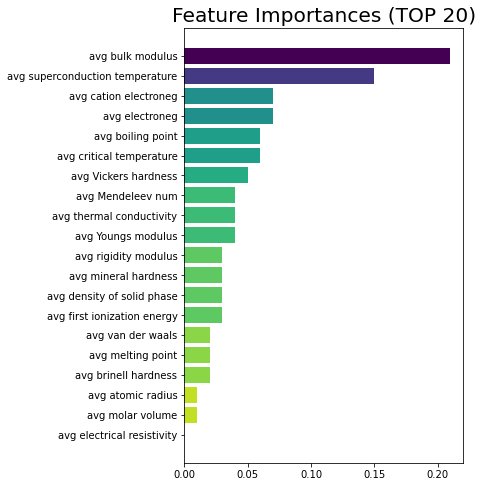

In [7]:
# Get feature importance: top 20
# Set the style
plt.subplots(figsize=(5,8))
plt.style.use('fivethirtyeight')
# list of x locations for plotting
x_values = list(range(20))
# Make a bar chart
my_cmap = plt.get_cmap("viridis")
rescale = lambda y: (np.max(y) - y) / (np.max(y)-np.min(y)+y)
plt.barh(x_values, [pair[1] for pair in most_20_feature_importances[0:20]], color = my_cmap(rescale([pair[1] for pair in most_20_feature_importances[0:20]])))

# Tick labels for x axis
plt.yticks(x_values, [pair[0] for pair in most_20_feature_importances[0:20]], rotation='horizontal', fontsize = 10)
plt.gca().invert_yaxis()
# Axis labels and title
plt.title('Feature Importances (TOP 20)');



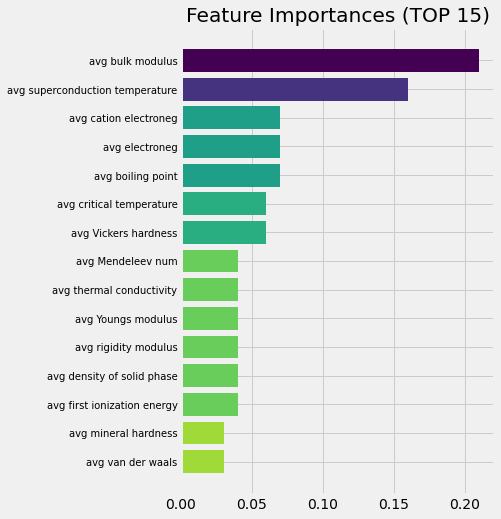

In [8]:
# Get feature importance: top 15
# Set the style
plt.subplots(figsize=(5,8))
plt.style.use('fivethirtyeight')
# list of x locations for plotting
x_values = list(range(15))
# Make a bar chart
my_cmap = plt.get_cmap("viridis")
rescale = lambda y: (np.max(y) - y) / (np.max(y)-np.min(y)+y)
plt.barh(x_values, [pair[1] for pair in most_15_feature_importances[0:15]],color = my_cmap(rescale([pair[1] for pair in most_15_feature_importances[0:15]])))
# Tick labels for x axis
plt.yticks(x_values, [pair[0] for pair in most_15_feature_importances[0:15]], rotation='horizontal', fontsize = 10)
plt.gca().invert_yaxis()
# Axis labels and title
plt.title('Feature Importances (TOP 15)');


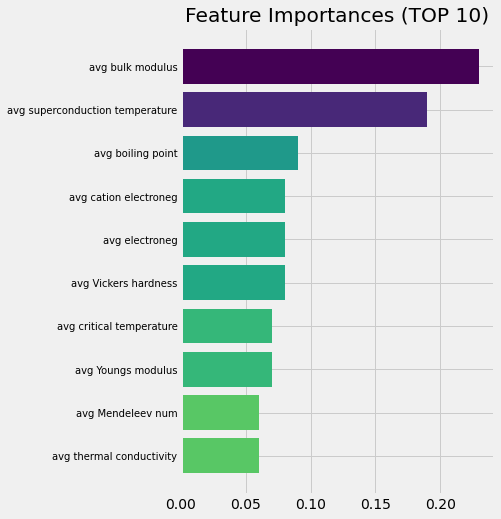

In [9]:
# Get feature importance: top 10
# Set the style
plt.subplots(figsize=(5,8))
plt.style.use('fivethirtyeight')
# list of x locations for plotting
x_values = list(range(10))
# Make a bar chart
my_cmap = plt.get_cmap("viridis")
rescale = lambda y: (np.max(y) - y) / (np.max(y)-np.min(y)+y)
plt.barh(x_values, [pair[1] for pair in most_10_feature_importances[0:10]], color = my_cmap(rescale([pair[1] for pair in most_10_feature_importances[0:10]])))
# Tick labels for x axis
plt.yticks(x_values, [pair[0] for pair in most_10_feature_importances[0:10]], rotation='horizontal', fontsize = 10)
plt.gca().invert_yaxis()
# Axis labels and title
plt.title('Feature Importances (TOP 10)');



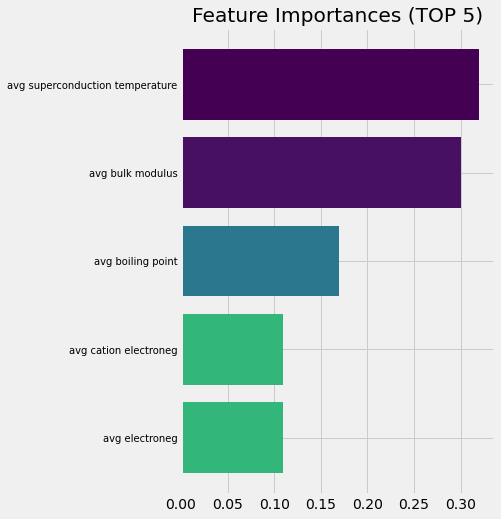

In [10]:
# Get feature importance: top 5
# Set the style
plt.subplots(figsize=(5,8))
plt.style.use('fivethirtyeight')
# list of x locations for plotting
x_values = list(range(5))
# Make a bar chart
my_cmap = plt.get_cmap("viridis")
rescale = lambda y: (np.max(y) - y) / (np.max(y)-np.min(y)+y)
plt.barh(x_values, [pair[1] for pair in most_5_feature_importances[0:5]], color = my_cmap(rescale([pair[1] for pair in most_5_feature_importances[0:5]])))
# Tick labels for x axis
plt.yticks(x_values, [pair[0] for pair in most_5_feature_importances[0:5]], rotation='horizontal', fontsize = 10)
plt.gca().invert_yaxis()
# Axis labels and title
plt.title('Feature Importances (TOP 5)');



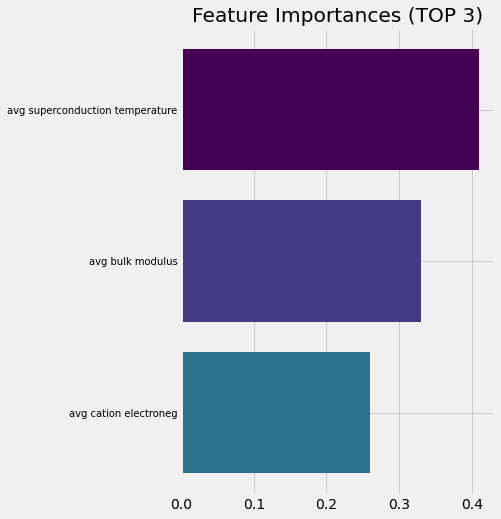

In [11]:
# Get feature importance: top 3
# Set the style
plt.subplots(figsize=(5,8))
plt.style.use('fivethirtyeight')
# list of x locations for plotting
x_values = list(range(3))
# Make a bar chart
my_cmap = plt.get_cmap("viridis")
rescale = lambda y: (np.max(y) - y) / (np.max(y)-np.min(y)+y)
plt.barh(x_values, [pair[1] for pair in most_3_feature_importances[0:3]], color = my_cmap(rescale([pair[1] for pair in most_3_feature_importances[0:3]])))
# Tick labels for x axis
plt.yticks(x_values, [pair[0] for pair in most_3_feature_importances[0:3]], rotation='horizontal', fontsize = 10)
plt.gca().invert_yaxis()
# Axis labels and title
plt.title('Feature Importances (TOP 3)');



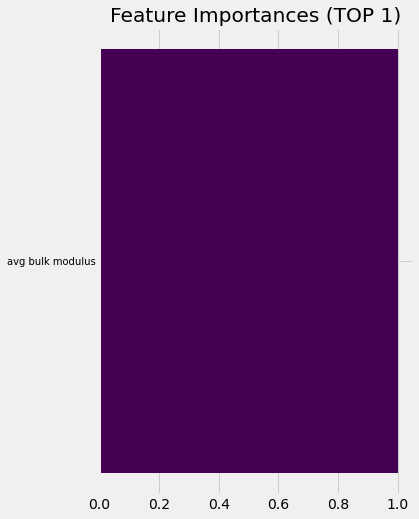

In [12]:
# Get feature importance: top 1
# Set the style
plt.subplots(figsize=(5,8))
plt.style.use('fivethirtyeight')
# list of x locations for plotting
x_values = list(range(1))
# Make a bar chart
my_cmap = plt.get_cmap("viridis")
rescale = lambda y: (np.max(y) - y) / (np.max(y)-np.min(y)+y)
plt.barh(x_values, [pair[1] for pair in most_1_feature_importances[0:1]], color = my_cmap(rescale([pair[1] for pair in most_1_feature_importances[0:1]])))
# Tick labels for x axis
plt.yticks(x_values, [pair[0] for pair in most_1_feature_importances[0:1]], rotation='horizontal', fontsize = 10)
plt.gca().invert_yaxis()
# Axis labels and title
plt.title('Feature Importances (TOP 1)');



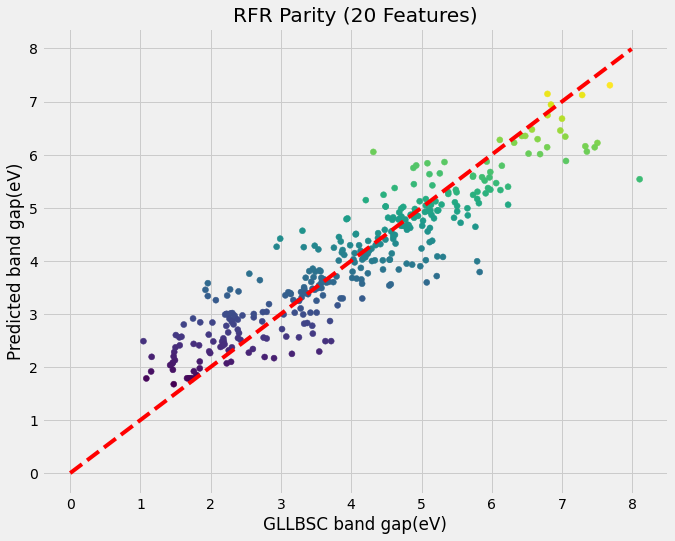

In [13]:
# TOP 20 Parity

plt.figure(figsize=(10,8))
A=np.arange(0,8,0.01)
norm = plt.Normalize(most_20_predictions.min(), most_20_predictions.max())
norm_y = norm(most_20_predictions)
plt.scatter(test_labels,most_20_predictions,c=norm_y, cmap='viridis');
plt.plot(A,A,'r--')
plt.ylabel('Predicted band gap(eV)'); plt.xlabel('GLLBSC band gap(eV)')
plt.title('RFR Parity (20 Features)');


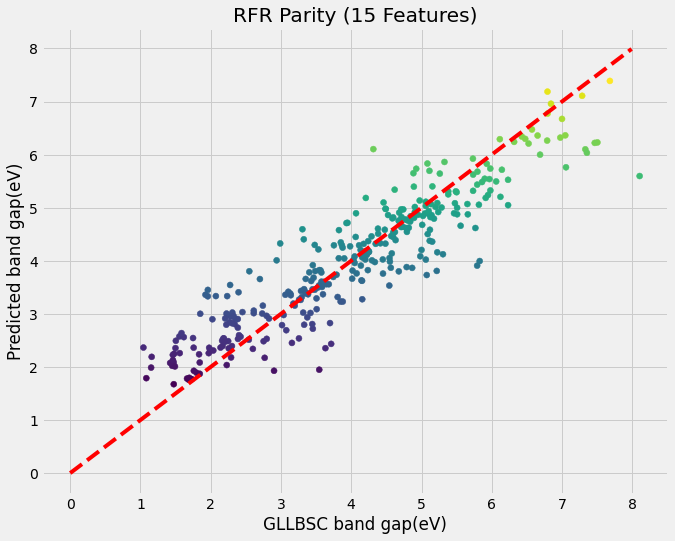

In [14]:
# TOP 15 Parity

plt.figure(figsize=(10,8))
A=np.arange(0,8,0.01)
norm = plt.Normalize(most_15_predictions.min(), most_15_predictions.max())
norm_y = norm(most_15_predictions)
plt.scatter(test_labels,most_15_predictions,c=norm_y, cmap='viridis');
plt.plot(A,A,'r--')
plt.ylabel('Predicted band gap(eV)'); plt.xlabel('GLLBSC band gap(eV)')
plt.title('RFR Parity (15 Features)');


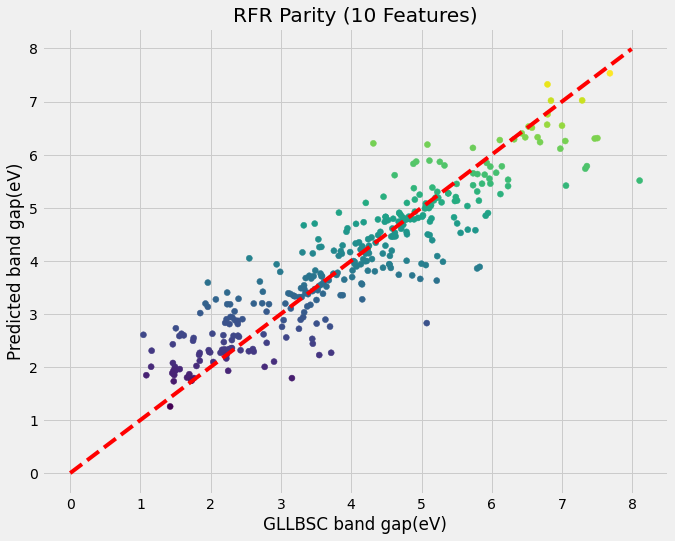

In [15]:
# Top 10 Parity
plt.figure(figsize=(10,8))
A=np.arange(0,8,0.01)
norm = plt.Normalize(most_10_predictions.min(), most_10_predictions.max())
norm_y = norm(most_10_predictions)
plt.scatter(test_labels,most_10_predictions,c=norm_y, cmap='viridis');
plt.plot(A,A,'r--')
plt.ylabel('Predicted band gap(eV)'); plt.xlabel('GLLBSC band gap(eV)')
plt.title('RFR Parity (10 Features)');


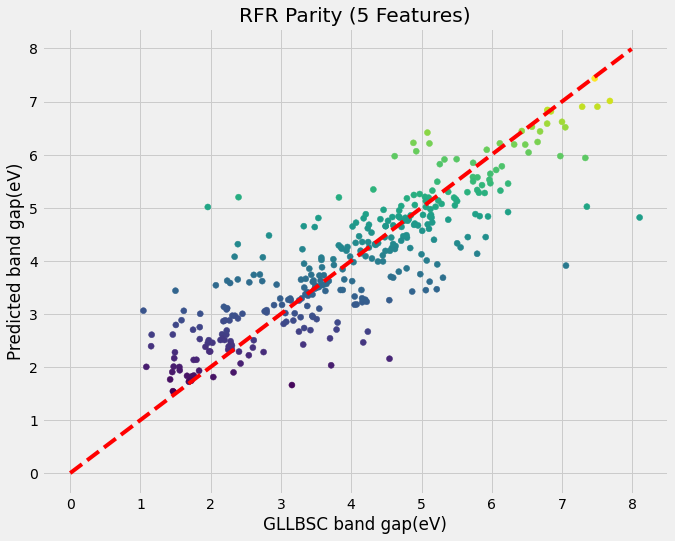

In [16]:
# Top 5 Parity
plt.figure(figsize=(10,8))
A=np.arange(0,8,0.01)
norm = plt.Normalize(most_5_predictions.min(), most_5_predictions.max())
norm_y = norm(most_5_predictions)
plt.scatter(test_labels,most_5_predictions,c=norm_y, cmap='viridis');
plt.plot(A,A,'r--')
plt.ylabel('Predicted band gap(eV)'); plt.xlabel('GLLBSC band gap(eV)')
plt.title('RFR Parity (5 Features)');

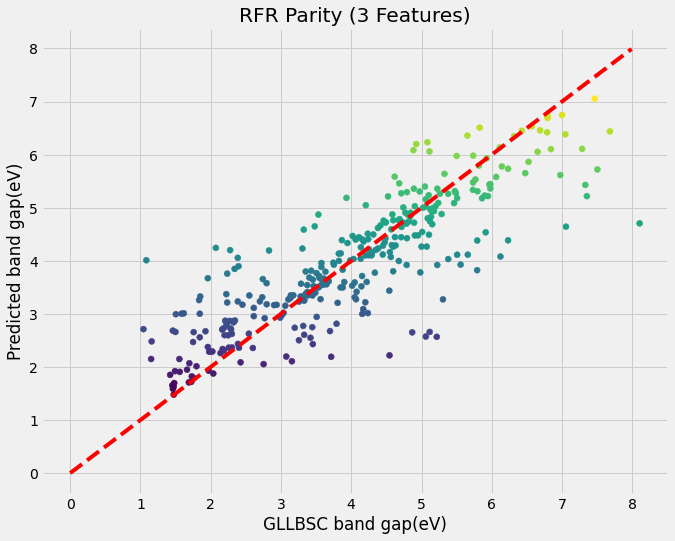

In [17]:
# Top 3 Parity
plt.figure(figsize=(10,8))
A=np.arange(0,8,0.01)
norm = plt.Normalize(most_3_predictions.min(), most_3_predictions.max())
norm_y = norm(most_3_predictions)
plt.scatter(test_labels,most_3_predictions,c=norm_y, cmap='viridis');
plt.plot(A,A,'r--')
plt.ylabel('Predicted band gap(eV)'); plt.xlabel('GLLBSC band gap(eV)')
plt.title('RFR Parity (3 Features)');


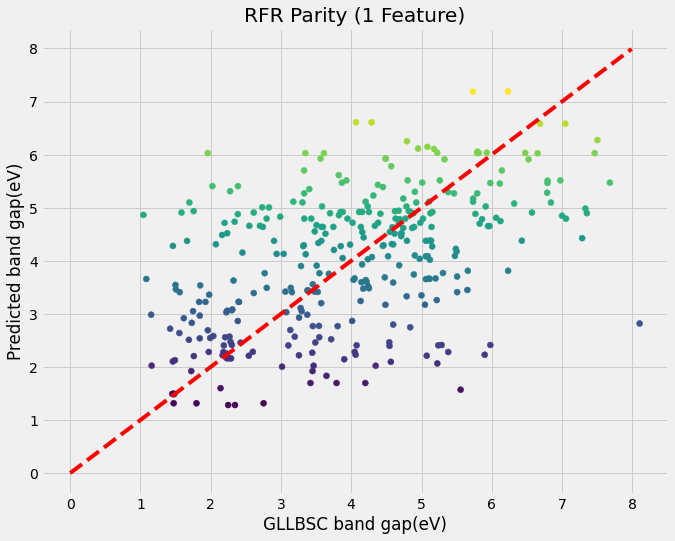

In [18]:
# Top 1 Parity
plt.figure(figsize=(10,8))
A=np.arange(0,8,0.01)
norm = plt.Normalize(most_1_predictions.min(), most_1_predictions.max())
norm_y = norm(most_1_predictions)
plt.scatter(test_labels,most_1_predictions,c=norm_y, cmap='viridis');
plt.plot(A,A,'r--')
plt.ylabel('Predicted band gap(eV)'); plt.xlabel('GLLBSC band gap(eV)')
plt.title('RFR Parity (1 Feature)');

In [21]:
# Using Top 10 features

print("---10------------------------------------------------------------------------")
train_features, test_features, train_labels, test_labels = train_test_split(df_double_copy, labels, test_size = 0.10, random_state = 14)
# Shape
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

rf_most_important = RandomForestRegressor(n_estimators= 700, random_state=14)
most_important_indices = [feature_list.index(feature_importances[i][0]) for i in range(0,10)]
most_train_important = train_features[:, most_important_indices]
most_test_important = test_features[:, most_important_indices]
# Train the random forest
rf_most_important.fit(most_train_important, train_labels)
# Make predictions and determine the error
most_15_predictions = rf_most_important.predict(most_test_important)
most_errors = abs(most_15_predictions - test_labels)
# Display the performance metrics
print('Mean Absolute Error of selected 15:', round(np.mean(most_errors), 2), 'degrees.')
most_mape = np.mean(100 * (most_errors / test_labels))
most_accuracy = 100 - most_mape
print('Accuracy of selected 15:', round(most_accuracy, 2), '%.')
# # Variable Importance
# # Get numerical feature importances
# most_15_feature_list = [feature_list[i] for i in most_important_indices]
# most_15_importances = list(rf_most_important.feature_importances_)
# # List of tuples with variable and importance
# most_15_feature_importances = [(df_double_copy, round(importance, 2)) for df_double_copy, importance in zip(most_15_feature_list, most_15_importances)]
# # Sort the feature importances by most important first
# most_15_feature_importances = sorted(most_15_feature_importances, key = lambda x: x[1], reverse = True)
# # Print out the feature and importances 
# [print('Feature: {:20} Importance: {}'.format(*pair)) for pair in most_15_feature_importances];


print("---20------------------------------------------------------------------------")
train_features, test_features, train_labels, test_labels = train_test_split(df_double_copy, labels, test_size = 0.20, random_state = 14)
# Shape
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

rf_most_important = RandomForestRegressor(n_estimators= 700, random_state=14)
most_important_indices = [feature_list.index(feature_importances[i][0]) for i in range(0,10)]
most_train_important = train_features[:, most_important_indices]
most_test_important = test_features[:, most_important_indices]
# Train the random forest
rf_most_important.fit(most_train_important, train_labels)
# Make predictions and determine the error
most_15_predictions = rf_most_important.predict(most_test_important)
most_errors = abs(most_15_predictions - test_labels)
# Display the performance metrics
print('Mean Absolute Error of selected 15:', round(np.mean(most_errors), 2), 'degrees.')
most_mape = np.mean(100 * (most_errors / test_labels))
most_accuracy = 100 - most_mape
print('Accuracy of selected 15:', round(most_accuracy, 2), '%.')
# # Variable Importance
# # Get numerical feature importances
# most_15_feature_list = [feature_list[i] for i in most_important_indices]
# most_15_importances = list(rf_most_important.feature_importances_)
# # List of tuples with variable and importance
# most_15_feature_importances = [(df_double_copy, round(importance, 2)) for df_double_copy, importance in zip(most_15_feature_list, most_15_importances)]
# # Sort the feature importances by most important first
# most_15_feature_importances = sorted(most_15_feature_importances, key = lambda x: x[1], reverse = True)
# # Print out the feature and importances 
# [print('Feature: {:20} Importance: {}'.format(*pair)) for pair in most_15_feature_importances];

print("---25------------------------------------------------------------------------")
train_features, test_features, train_labels, test_labels = train_test_split(df_double_copy, labels, test_size = 0.25, random_state = 14)
# Shape
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

rf_most_important = RandomForestRegressor(n_estimators= 700, random_state=14)
most_important_indices = [feature_list.index(feature_importances[i][0]) for i in range(0,10)]
most_train_important = train_features[:, most_important_indices]
most_test_important = test_features[:, most_important_indices]
# Train the random forest
rf_most_important.fit(most_train_important, train_labels)
# Make predictions and determine the error
most_15_predictions = rf_most_important.predict(most_test_important)
most_errors = abs(most_15_predictions - test_labels)
# Display the performance metrics
print('Mean Absolute Error of selected 15:', round(np.mean(most_errors), 2), 'degrees.')
most_mape = np.mean(100 * (most_errors / test_labels))
most_accuracy = 100 - most_mape
print('Accuracy of selected 15:', round(most_accuracy, 2), '%.')
# # Variable Importance
# # Get numerical feature importances
# most_15_feature_list = [feature_list[i] for i in most_important_indices]
# most_15_importances = list(rf_most_important.feature_importances_)
# # List of tuples with variable and importance
# most_15_feature_importances = [(df_double_copy, round(importance, 2)) for df_double_copy, importance in zip(most_15_feature_list, most_15_importances)]
# # Sort the feature importances by most important first
# most_15_feature_importances = sorted(most_15_feature_importances, key = lambda x: x[1], reverse = True)
# # Print out the feature and importances 
# [print('Feature: {:20} Importance: {}'.format(*pair)) for pair in most_15_feature_importances];

print("---30------------------------------------------------------------------------")
train_features, test_features, train_labels, test_labels = train_test_split(df_double_copy, labels, test_size = 0.30, random_state = 14)
# Shape
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

rf_most_important = RandomForestRegressor(n_estimators= 700, random_state=14)
most_important_indices = [feature_list.index(feature_importances[i][0]) for i in range(0,10)]
most_train_important = train_features[:, most_important_indices]
most_test_important = test_features[:, most_important_indices]
# Train the random forest
rf_most_important.fit(most_train_important, train_labels)
# Make predictions and determine the error
most_15_predictions = rf_most_important.predict(most_test_important)
most_errors = abs(most_15_predictions - test_labels)
# Display the performance metrics
print('Mean Absolute Error of selected 15:', round(np.mean(most_errors), 2), 'degrees.')
most_mape = np.mean(100 * (most_errors / test_labels))
most_accuracy = 100 - most_mape
print('Accuracy of selected 15:', round(most_accuracy, 2), '%.')
# # Variable Importance
# # Get numerical feature importances
# most_15_feature_list = [feature_list[i] for i in most_important_indices]
# most_15_importances = list(rf_most_important.feature_importances_)
# # List of tuples with variable and importance
# most_15_feature_importances = [(df_double_copy, round(importance, 2)) for df_double_copy, importance in zip(most_15_feature_list, most_15_importances)]
# # Sort the feature importances by most important first
# most_15_feature_importances = sorted(most_15_feature_importances, key = lambda x: x[1], reverse = True)
# # Print out the feature and importances 
# [print('Feature: {:20} Importance: {}'.format(*pair)) for pair in most_15_feature_importances];


print("---40------------------------------------------------------------------------")
train_features, test_features, train_labels, test_labels = train_test_split(df_double_copy, labels, test_size = 0.40, random_state = 14)
# Shape
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

rf_most_important = RandomForestRegressor(n_estimators= 700, random_state=14)
most_important_indices = [feature_list.index(feature_importances[i][0]) for i in range(0,10)]
most_train_important = train_features[:, most_important_indices]
most_test_important = test_features[:, most_important_indices]
# Train the random forest
rf_most_important.fit(most_train_important, train_labels)
# Make predictions and determine the error
most_15_predictions = rf_most_important.predict(most_test_important)
most_errors = abs(most_15_predictions - test_labels)
# Display the performance metrics
print('Mean Absolute Error of selected 15:', round(np.mean(most_errors), 2), 'degrees.')
most_mape = np.mean(100 * (most_errors / test_labels))
most_accuracy = 100 - most_mape
print('Accuracy of selected 15:', round(most_accuracy, 2), '%.')
# # Variable Importance
# # Get numerical feature importances
# most_15_feature_list = [feature_list[i] for i in most_important_indices]
# most_15_importances = list(rf_most_important.feature_importances_)
# # List of tuples with variable and importance
# most_15_feature_importances = [(df_double_copy, round(importance, 2)) for df_double_copy, importance in zip(most_15_feature_list, most_15_importances)]
# # Sort the feature importances by most important first
# most_15_feature_importances = sorted(most_15_feature_importances, key = lambda x: x[1], reverse = True)
# # Print out the feature and importances 
# [print('Feature: {:20} Importance: {}'.format(*pair)) for pair in most_15_feature_importances];


print("---50------------------------------------------------------------------------")
train_features, test_features, train_labels, test_labels = train_test_split(df_double_copy, labels, test_size = 0.50, random_state = 14)
# Shape
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

rf_most_important = RandomForestRegressor(n_estimators= 700, random_state=14)
most_important_indices = [feature_list.index(feature_importances[i][0]) for i in range(0,10)]
most_train_important = train_features[:, most_important_indices]
most_test_important = test_features[:, most_important_indices]
# Train the random forest
rf_most_important.fit(most_train_important, train_labels)
# Make predictions and determine the error
most_15_predictions = rf_most_important.predict(most_test_important)
most_errors = abs(most_15_predictions - test_labels)
# Display the performance metrics
print('Mean Absolute Error of selected 15:', round(np.mean(most_errors), 2), 'degrees.')
most_mape = np.mean(100 * (most_errors / test_labels))
most_accuracy = 100 - most_mape
print('Accuracy of selected 15:', round(most_accuracy, 2), '%.')
# # Variable Importance
# # Get numerical feature importances
# most_15_feature_list = [feature_list[i] for i in most_important_indices]
# most_15_importances = list(rf_most_important.feature_importances_)
# # List of tuples with variable and importance
# most_15_feature_importances = [(df_double_copy, round(importance, 2)) for df_double_copy, importance in zip(most_15_feature_list, most_15_importances)]
# # Sort the feature importances by most important first
# most_15_feature_importances = sorted(most_15_feature_importances, key = lambda x: x[1], reverse = True)
# # Print out the feature and importances 
# [print('Feature: {:20} Importance: {}'.format(*pair)) for pair in most_15_feature_importances];


print("---60------------------------------------------------------------------------")
train_features, test_features, train_labels, test_labels = train_test_split(df_double_copy, labels, test_size = 0.60, random_state = 14)
# Shape
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

rf_most_important = RandomForestRegressor(n_estimators= 700, random_state=14)
most_important_indices = [feature_list.index(feature_importances[i][0]) for i in range(0,10)]
most_train_important = train_features[:, most_important_indices]
most_test_important = test_features[:, most_important_indices]
# Train the random forest
rf_most_important.fit(most_train_important, train_labels)
# Make predictions and determine the error
most_15_predictions = rf_most_important.predict(most_test_important)
most_errors = abs(most_15_predictions - test_labels)
# Display the performance metrics
print('Mean Absolute Error of selected 15:', round(np.mean(most_errors), 2), 'degrees.')
most_mape = np.mean(100 * (most_errors / test_labels))
most_accuracy = 100 - most_mape
print('Accuracy of selected 15:', round(most_accuracy, 2), '%.')
# # Variable Importance
# # Get numerical feature importances
# most_15_feature_list = [feature_list[i] for i in most_important_indices]
# most_15_importances = list(rf_most_important.feature_importances_)
# # List of tuples with variable and importance
# most_15_feature_importances = [(df_double_copy, round(importance, 2)) for df_double_copy, importance in zip(most_15_feature_list, most_15_importances)]
# # Sort the feature importances by most important first
# most_15_feature_importances = sorted(most_15_feature_importances, key = lambda x: x[1], reverse = True)
# # Print out the feature and importances 
# [print('Feature: {:20} Importance: {}'.format(*pair)) for pair in most_15_feature_importances];

print("---75------------------------------------------------------------------------")
train_features, test_features, train_labels, test_labels = train_test_split(df_double_copy, labels, test_size = 0.75, random_state = 14)
# Shape
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

rf_most_important = RandomForestRegressor(n_estimators= 700, random_state=14)
most_important_indices = [feature_list.index(feature_importances[i][0]) for i in range(0,10)]
most_train_important = train_features[:, most_important_indices]
most_test_important = test_features[:, most_important_indices]
# Train the random forest
rf_most_important.fit(most_train_important, train_labels)
# Make predictions and determine the error
most_15_predictions = rf_most_important.predict(most_test_important)
most_errors = abs(most_15_predictions - test_labels)
# Display the performance metrics
print('Mean Absolute Error of selected 15:', round(np.mean(most_errors), 2), 'degrees.')
most_mape = np.mean(100 * (most_errors / test_labels))
most_accuracy = 100 - most_mape
print('Accuracy of selected 15:', round(most_accuracy, 2), '%.')
# # Variable Importance
# # Get numerical feature importances
# most_15_feature_list = [feature_list[i] for i in most_important_indices]
# most_15_importances = list(rf_most_important.feature_importances_)
# # List of tuples with variable and importance
# most_15_feature_importances = [(df_double_copy, round(importance, 2)) for df_double_copy, importance in zip(most_15_feature_list, most_15_importances)]
# # Sort the feature importances by most important first
# most_15_feature_importances = sorted(most_15_feature_importances, key = lambda x: x[1], reverse = True)
# # Print out the feature and importances 
# [print('Feature: {:20} Importance: {}'.format(*pair)) for pair in most_15_feature_importances];


print("---80------------------------------------------------------------------------")
# 10:90
train_features, test_features, train_labels, test_labels = train_test_split(df_double_copy, labels, test_size = 0.80, random_state = 14)
# Shape
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

rf_most_important = RandomForestRegressor(n_estimators= 700, random_state=14)
most_important_indices = [feature_list.index(feature_importances[i][0]) for i in range(0,10)]
most_train_important = train_features[:, most_important_indices]
most_test_important = test_features[:, most_important_indices]
# Train the random forest
rf_most_important.fit(most_train_important, train_labels)
# Make predictions and determine the error
most_15_predictions = rf_most_important.predict(most_test_important)
most_errors = abs(most_15_predictions - test_labels)
# Display the performance metrics
print('Mean Absolute Error of selected 15:', round(np.mean(most_errors), 2), 'degrees.')
most_mape = np.mean(100 * (most_errors / test_labels))
most_accuracy = 100 - most_mape
print('Accuracy of selected 15:', round(most_accuracy, 2), '%.')
# # Variable Importance
# # Get numerical feature importances
# most_15_feature_list = [feature_list[i] for i in most_important_indices]
# most_15_importances = list(rf_most_important.feature_importances_)
# # List of tuples with variable and importance
# most_15_feature_importances = [(df_double_copy, round(importance, 2)) for df_double_copy, importance in zip(most_15_feature_list, most_15_importances)]
# # Sort the feature importances by most important first
# most_15_feature_importances = sorted(most_15_feature_importances, key = lambda x: x[1], reverse = True)
# # Print out the feature and importances 
# [print('Feature: {:20} Importance: {}'.format(*pair)) for pair in most_15_feature_importances];

---10------------------------------------------------------------------------
Training Features Shape: (1175, 20)
Training Labels Shape: (1175,)
Testing Features Shape: (131, 20)
Testing Labels Shape: (131,)
Mean Absolute Error of selected 15: 0.41 degrees.
Accuracy of selected 15: 87.88 %.
---20------------------------------------------------------------------------
Training Features Shape: (1044, 20)
Training Labels Shape: (1044,)
Testing Features Shape: (262, 20)
Testing Labels Shape: (262,)
Mean Absolute Error of selected 15: 0.45 degrees.
Accuracy of selected 15: 86.78 %.
---25------------------------------------------------------------------------
Training Features Shape: (979, 20)
Training Labels Shape: (979,)
Testing Features Shape: (327, 20)
Testing Labels Shape: (327,)
Mean Absolute Error of selected 15: 0.46 degrees.
Accuracy of selected 15: 85.58 %.
---30------------------------------------------------------------------------
Training Features Shape: (914, 20)
Training Labe

In [22]:
# Get tree image

# Pull out one tree from the forest
tree = rf.estimators_[5]
# Export the image to a dot file
export_graphviz(tree, out_file = '/Users/fionaz/Downloads/tree.dot', feature_names = feature_list, rounded = True, precision = 1)
# Use dot file to create a graph
(graph, ) = pydot.graph_from_dot_file('/Users/fionaz/Downloads/tree.dot')
# Write graph to a png file
graph.write_png('/Users/fionaz/Downloads/tree.png')

AttributeError: 'RandomForestRegressor' object has no attribute 'estimators_'